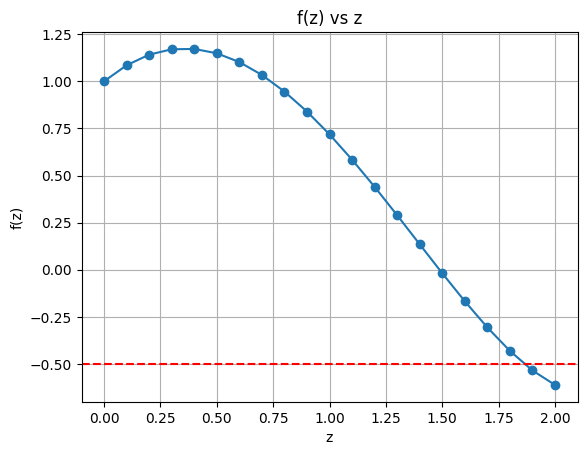

[ 1.          1.08517092  1.14140276  1.16985881  1.1718247   1.14872127
  1.1021188   1.03375271  0.94554093  0.83960311  0.71828183  0.58416602
  0.44011692  0.28929667  0.13519997 -0.01831093 -0.16696758 -0.30605261
 -0.43035254 -0.53410556 -0.6109439 ]
[ 1.          0.70517092  0.42140276  0.14985881 -0.1081753  -0.35127873
 -0.5778812  -0.78624729 -0.97445907 -1.14039689 -1.28171817 -1.39583398
 -1.47988308 -1.53070333 -1.54480003 -1.51831093 -1.44696758 -1.32605261
 -1.15035254 -0.91410556 -0.6109439 ]
[1.9000000000000001, 1.3157069134854713, 1.4884360131676244, 1.4879620338397683, 1.487962065498177, 1.487962065498177]
1.4879620654981773
0.0
-4.440892098500626e-16


In [ ]:
# Problem (a)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def f(z):
    return np.exp(z) - 2*z**2

def df(z):
    return np.exp(z) - 4*z

zi = np.linspace(0, 2, 21)
fz = f(zi)
dfz = df(zi)

plt.plot(zi, fz, marker='o')
plt.axhline(-0.5, color='red', linestyle='--')
plt.title('f(z) vs z')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.grid(True)
plt.show()

i_closest = np.argmin(np.abs(fz + 0.5))
z0 = zi[i_closest]

zn = [z0]
tol = 1e-15
max_iter = 20

for k in range(max_iter):
    z_prev = zn[-1]
    z_new = z_prev - f(z_prev) / df(z_prev)
    zn.append(z_new)
    if abs(z_new - z_prev) < tol:
        break

for i in range(1, len(zn)):
    approx = zn[i]
    value = f(approx)

zm = fsolve(f, z0)[0]
fzm = f(zm)

diffnm = zn[-1] - zm

print(fz)
print(dfz)
print(zn)
print(zm)
print(fzm)
print(diffnm)

In [ ]:
import numpy as np
from scipy.special import jv
from numpy.linalg import norm

N = int(1e6)
T = 10
h = T / N
x = np.linspace(0, T, N + 1)

U = np.zeros(N + 1)
U[0] = 0
U[1] = 0.5 * h

for n in range(1, N):
    xn = x[n]
    if xn == 0:
        continue
    A = (h**2) * (xn**2 - 1) / (xn**2)
    B = h / (2 * xn)
    U[n + 1] = (2 * (1 - A / 2) * U[n] - (1 - B) * U[n - 1]) / (1 + B)

sx = x[1000] + x[30000] + x[60000] + x[90000]

U1000 = U[1000]
U10000 = U[10000]
U50000 = U[50000]
U100000 = U[100000]
U1 = U[1]

bessel = jv(1, x)
normbessel1 = norm(U - bessel, ord=np.inf)
R5normbessel1 = float(f"{normbessel1:.5g}")

# Final output
print(f"N = {N}")
print(f"T = {T}")
print(f"U1 = {U1:.6f}")
print(f"sx = {sx:.6f}")
print(f"U1000 = {U1000:.6f}")
print(f"U10000 = {U10000:.6f}")
print(f"U50000 = {U50000:.6f}")
print(f"U100000 = {U100000:.6f}")
print(f"normbessel1 = {normbessel1:.10e}")
print(f"R5normbessel1 = {R5normbessel1}")

N = 1000000
T = 10
U1 = 0.000005
sx = 1.810000
U1000 = 0.005000
U10000 = 0.049938
U50000 = 0.242268
U100000 = 0.440051
normbessel1 = 2.7741758959e-09
R5normbessel1 = 2.7742e-09


In [30]:
import numpy as np

def naive_ifft(y):
    N = len(y)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        sum_val = 0
        for k in range(N):
            angle = 2j * np.pi * k * n / N
            sum_val += y[k] * np.exp(angle)
        x[n] = sum_val / N
    return x

from numpy.random import randn, seed

modx206 = None
modx207 = None
modx208 = None
modx209 = None
modx2010 = None
modx2011 = None

for m in range(6, 12):
    seed(1)
    ym = randn(2**m)
    x = naive_ifft(ym)
    value = abs(x[20])
    if m == 6:
        modx206 = value
    elif m == 7:
        modx207 = value
    elif m == 8:
        modx208 = value
    elif m == 9:
        modx209 = value
    elif m == 10:
        modx2010 = value
    elif m == 11:
        modx2011 = value

print("modx206 =", modx206)
print("modx207 =", modx207)
print("modx208 =", modx208)
print("modx209 =", modx209)
print("modx2010 =", modx2010)
print("modx2011 =", modx2011)

modx206 = 0.07140513113456468
modx207 = 0.04017205833033997
modx208 = 0.034575694281474605
modx209 = 0.06780632417449761
modx2010 = 0.03414477062812646
modx2011 = 0.009947254001288625
